In [32]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [33]:
#Base
limite = pd.read_excel(r"C:\Users\alexa\OneDrive\Área de Trabalho\repositorios_git\DNC_repository\exe_regressao_linear_multipla\regressao_linear_multipla_scikit-learn\limite_credito_dummy.xlsx")
limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [34]:
limite.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,35000.000000


In [35]:
limite.corr()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
Idade,1.000000,0.239445,0.213186,0.057183,0.228117
RendimentoTotal,0.239445,1.000000,0.960551,0.031041,0.858120
Salario,0.213186,0.960551,1.000000,0.081792,0.888839
LimitedeCreditoImediato,0.057183,0.031041,0.081792,1.000000,0.226990
LimitedoChequeEspecial,0.228117,0.858120,0.888839,0.226990,1.000000


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#escolaridade
le.fit(limite.Escolaridade) 
limite.Escolaridade = le.transform(limite.Escolaridade)

# gênero
le.fit(limite.Gênero) 
limite.Gênero = le.transform(limite.Gênero)

#regiao
le.fit(limite.Região) 
limite.Região = le.transform(limite.Região)

<AxesSubplot:xlabel='Idade', ylabel='Count'>

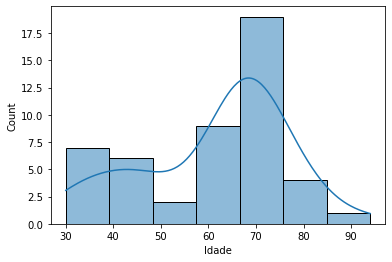

In [37]:
sns.histplot(limite, x="Idade", kde=True)

<AxesSubplot:xlabel='RendimentoTotal', ylabel='Count'>

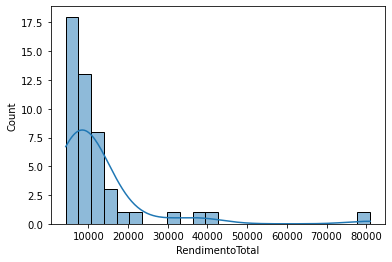

In [38]:
sns.histplot(limite, x="RendimentoTotal",kde=True)

<AxesSubplot:xlabel='Salario', ylabel='Count'>

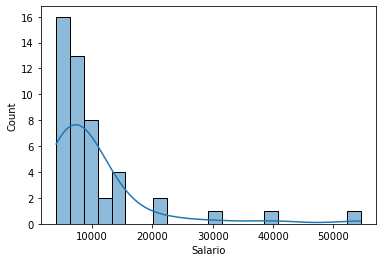

In [39]:
sns.histplot(limite, x="Salario", kde=True)

<AxesSubplot:xlabel='LimitedeCreditoImediato', ylabel='Count'>

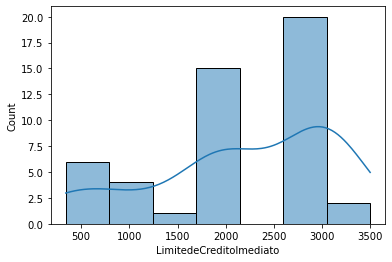

In [40]:
sns.histplot(limite, x="LimitedeCreditoImediato", kde=True)

<AxesSubplot:xlabel='LimitedoChequeEspecial', ylabel='Count'>

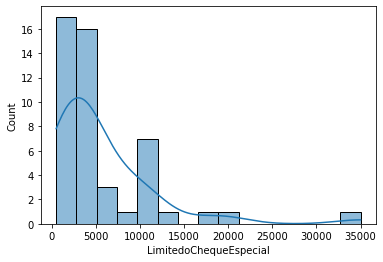

In [41]:
sns.histplot(limite, x="LimitedoChequeEspecial", kde=True)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


limite_norm = pd.DataFrame(scaler.fit_transform(limite), index=limite.index, columns=limite.columns)

In [43]:
limite_norm.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,0.625000,0.083911,0.023518,0.018987,0.0,0.0,0.0,0.000000
1,0.593750,0.009126,0.019278,0.012658,0.0,0.0,0.0,0.002899
2,0.218750,0.019557,0.035128,0.050633,0.0,0.0,0.0,0.008696
3,0.656250,0.000000,0.005409,0.525316,0.0,0.0,0.0,0.014493
4,0.703125,0.001304,0.007390,0.841772,0.0,0.0,0.0,0.014493


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


limite_norm = pd.DataFrame(scaler.fit_transform(limite), index=limite.index, columns=limite.columns)

In [45]:
limite_norm.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,0.564760,-0.123045,-0.573193,-1.912381,-0.774597,-0.919866,-1.0,-0.843934
1,0.432523,-0.581621,-0.596367,-1.933927,-0.774597,-0.919866,-1.0,-0.827453
2,-1.154314,-0.517663,-0.509735,-1.804654,-0.774597,-0.919866,-1.0,-0.794492
3,0.696996,-0.637584,-0.672170,-0.188747,-0.774597,-0.919866,-1.0,-0.761530
4,0.895351,-0.629589,-0.661341,0.888524,-0.774597,-0.919866,-1.0,-0.761530


<AxesSubplot:xlabel='Idade', ylabel='Count'>

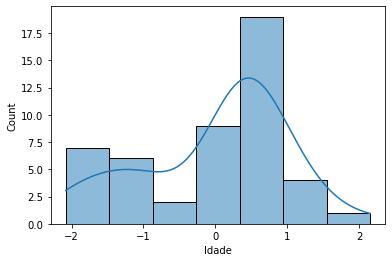

In [46]:
sns.histplot(limite_norm, x="Idade", kde=True)

<AxesSubplot:xlabel='RendimentoTotal', ylabel='Count'>

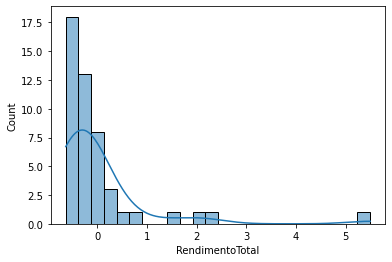

In [47]:
sns.histplot(limite_norm, x="RendimentoTotal", kde=True)

<AxesSubplot:xlabel='Salario', ylabel='Count'>

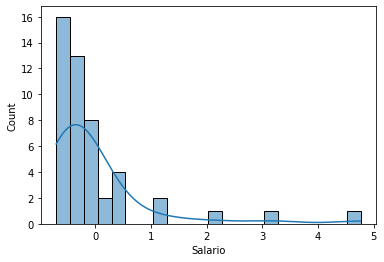

In [48]:
sns.histplot(limite_norm, x="Salario", kde=True)

<AxesSubplot:xlabel='LimitedeCreditoImediato', ylabel='Count'>

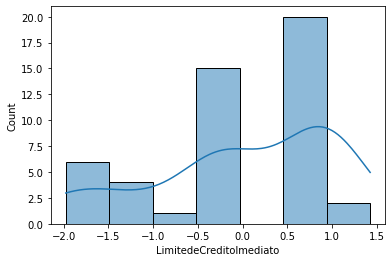

In [49]:
sns.histplot(limite_norm, x="LimitedeCreditoImediato", kde=True)

In [50]:
limite.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,0.375000,0.458333,0.500000,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,0.489246,0.503534,0.505291,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,0.000000,0.000000,0.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,0.000000,0.000000,0.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,0.000000,0.000000,0.500000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,1.000000,1.000000,1.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,1.000000,1.000000,1.000000,35000.000000


In [51]:
limite_norm.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,48.000000,4.800000e+01
mean,-1.249001e-16,-3.700743e-17,7.401487e-17,-1.844589e-16,2.312965e-16,2.035409e-16,0.000000,1.665335e-16
std,1.010582e+00,1.010582e+00,1.010582e+00,1.010582e+00,1.010582e+00,1.010582e+00,1.010582,1.010582e+00
min,-2.079969e+00,-6.375839e-01,-7.017336e-01,-1.977017e+00,-7.745967e-01,-9.198662e-01,-1.000000,-8.439339e-01
25%,-9.559591e-01,-4.712942e-01,-4.934917e-01,-2.695423e-01,-7.745967e-01,-9.198662e-01,-1.000000,-5.534609e-01
50%,3.333460e-01,-3.098013e-01,-3.364710e-01,-1.887469e-01,-7.745967e-01,-9.198662e-01,0.000000,-3.412714e-01
75%,5.647597e-01,8.247865e-03,-3.726534e-02,8.885244e-01,1.290994e+00,1.087115e+00,1.000000,1.449103e-01
max,2.151597e+00,5.494350e+00,4.763994e+00,1.427160e+00,1.290994e+00,1.087115e+00,1.000000,4.841920e+00


In [52]:
import statsmodels.formula.api as smf

In [53]:
#modelo MRLS
function = 'LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade+Região+Gênero'
model = smf.ols(formula=function, data=limite_norm).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Tue, 30 Jul 2024   Prob (F-statistic):           7.44e-17
Time:                            10:41:37   Log-Likelihood:                -16.095
No. Observations:                      48   AIC:                             48.19
Df Residuals:                          40   BIC:                             63.16
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [54]:
#modelo MRLS
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade+Região+Gênero'
model = smf.ols(formula=function, data=limite_norm).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Tue, 30 Jul 2024   Prob (F-statistic):           9.97e-18
Time:                            10:41:37   Log-Likelihood:                -16.124
No. Observations:                      48   AIC:                             46.25
Df Residuals:                          41   BIC:                             59.35
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [55]:
#modelo MRLS
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+Escolaridade+Região+Gênero'
model = smf.ols(formula=function, data=limite_norm).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.884
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     64.26
Date:                    Tue, 30 Jul 2024   Prob (F-statistic):           1.39e-18
Time:                            10:41:37   Log-Likelihood:                -16.326
No. Observations:                      48   AIC:                             44.65
Df Residuals:                          42   BIC:                             55.88
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [56]:
#modelo MRLS
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+Região+Gênero'
model = smf.ols(formula=function, data=limite_norm).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.883
Model:                                OLS   Adj. R-squared:                  0.872
Method:                     Least Squares   F-statistic:                     80.75
Date:                    Tue, 30 Jul 2024   Prob (F-statistic):           2.02e-19
Time:                            10:41:37   Log-Likelihood:                -16.714
No. Observations:                      48   AIC:                             43.43
Df Residuals:                          43   BIC:                             52.78
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [57]:
#modelo MRLS
function = 'LimitedoChequeEspecial~Salario+Região+Gênero-1'
model = smf.ols(formula=function, data=limite_norm).fit() 
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.879
Model:                                OLS   Adj. R-squared (uncentered):              0.871
Method:                     Least Squares   F-statistic:                              109.2
Date:                    Tue, 30 Jul 2024   Prob (F-statistic):                    1.14e-20
Time:                            10:41:37   Log-Likelihood:                         -17.385
No. Observations:                      48   AIC:                                      40.77
Df Residuals:                          45   BIC:                                      46.38
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [58]:
x = limite_norm[["Salario","Região","Gênero"]]

y = limite_norm[["LimitedoChequeEspecial"]]

In [59]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.871127025731754


In [61]:
y_pred_train = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.2315362328577898
MSE: 0.1149020457638938
RMSE: 0.3389720427467342


In [62]:
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.32275464226861084
MSE: 0.1819625025847844
RMSE: 0.4265706302416804
